# Market data
To consult historical market data we can use [yahoo finance](https://pypi.org/project/yfinance/).

Install with pip:

```bash
pip install yfinance
```

## Google
The `Ticker` object allows to access data of different companies by a symbol.

To see the symbols go to [here](https://finance.yahoo.com/lookup/?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAALuXWVw92dKctt1NEfqg9Jh8oAQEy3NeGJh-7J4-ASSygtJvtY-suqesylI3S-GoB8Kn_OybCiQWUiIsZ0hiFut75takVAQ8CH0324HasflzPjos1Eo65A_R1jRH_czAq_E03G-SeNsn2owsj7ScSK4uk0_oOy2vgswqziNJnJYm)

In [1]:
# yahoo finance module
import yfinance as yf

# define ticker
ticker_symbol = "GOOGL"
# search the GOOGLE stock data
google_stock = yf.Ticker(ticker_symbol)
google_stock

yfinance.Ticker object <GOOGL>

In [3]:
# get historical market data
google_stock_data = google_stock.history(period="1y")
print(google_stock_data.head())

                                 Open        High         Low       Close  \
Date                                                                        
2023-11-07 00:00:00-05:00  130.387147  131.584180  129.559196  130.646500   
2023-11-08 00:00:00-05:00  130.646497  131.883440  130.456964  131.514343   
2023-11-09 00:00:00-05:00  131.634057  132.222596  129.748726  129.918304   
2023-11-10 00:00:00-05:00  129.778657  132.471985  129.090359  132.262497   
2023-11-13 00:00:00-05:00  131.454486  132.262483  130.925796  131.763718   

                             Volume  Dividends  Stock Splits  
Date                                                          
2023-11-07 00:00:00-05:00  29757300        0.0           0.0  
2023-11-08 00:00:00-05:00  26425800        0.0           0.0  
2023-11-09 00:00:00-05:00  23747800        0.0           0.0  
2023-11-10 00:00:00-05:00  26913300        0.0           0.0  
2023-11-13 00:00:00-05:00  18324800        0.0           0.0  


**Note**: You can change the `period` parameter (e.g., `"1d"`, `"5d"`, `"1mo"`, `"1y"`)

In [25]:
google_stock_data.index

DatetimeIndex(['2023-11-07 00:00:00-05:00', '2023-11-08 00:00:00-05:00',
               '2023-11-09 00:00:00-05:00', '2023-11-10 00:00:00-05:00',
               '2023-11-13 00:00:00-05:00', '2023-11-14 00:00:00-05:00',
               '2023-11-15 00:00:00-05:00', '2023-11-16 00:00:00-05:00',
               '2023-11-17 00:00:00-05:00', '2023-11-20 00:00:00-05:00',
               ...
               '2024-10-24 00:00:00-04:00', '2024-10-25 00:00:00-04:00',
               '2024-10-28 00:00:00-04:00', '2024-10-29 00:00:00-04:00',
               '2024-10-30 00:00:00-04:00', '2024-10-31 00:00:00-04:00',
               '2024-11-01 00:00:00-04:00', '2024-11-04 00:00:00-05:00',
               '2024-11-05 00:00:00-05:00', '2024-11-06 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=252, freq=None)

## Change frequency

In [26]:
google_stock_data.asfreq('Q')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-12-31 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-03-31 00:00:00-04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-06-30 00:00:00-04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-09-30 00:00:00-04:00,163.320007,166.149994,163.259995,165.850006,20413900.0,0.0,0.0


## Function to get data

In [4]:
import pandas as pd

In [22]:
def get_market_data(ticker:str, period:str, field:str) -> pd.DataFrame:
    # search data
    company_stock = yf.Ticker(ticker)
    # get a period of historical data 
    company_stock_data = company_stock.history(period)
    # return selected field
    historical_data = company_stock_data[[field]]
    # change datetime format
    historical_data.index = historical_data.index.date
    return historical_data

Testing with **TESLA**

In [18]:
TESLA = get_market_data(ticker='TSLA', period='2y', field='Close')
TESLA.head()

,Close
2022-11-07,197.080002
2022-11-08,191.300003
2022-11-09,177.589996
2022-11-10,190.720001
2022-11-11,195.970001


In [19]:
TESLA.tail()

,Close
2024-10-31,249.850006
2024-11-01,248.979996
2024-11-04,242.839996
2024-11-05,251.440002
2024-11-06,288.529999


In [20]:
import matplotlib.pyplot as plt

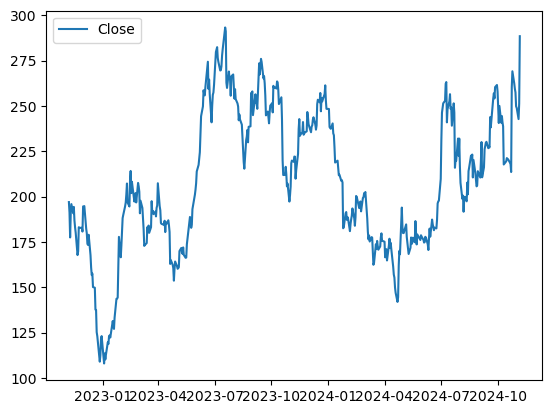

In [21]:
TESLA.plot()
plt.show()

In [24]:
TESLA.index

Index([2022-11-07, 2022-11-08, 2022-11-09, 2022-11-10, 2022-11-11, 2022-11-14,
       2022-11-15, 2022-11-16, 2022-11-17, 2022-11-18,
       ...
       2024-10-24, 2024-10-25, 2024-10-28, 2024-10-29, 2024-10-30, 2024-10-31,
       2024-11-01, 2024-11-04, 2024-11-05, 2024-11-06],
      dtype='object', length=503)